# Análisis Estadístico Descriptivo - Tienda Aurelion

Cuaderno para realizar el análisis descriptivo de los datos de ventas de la tienda Aurelion, basado en `ventas_limpias.csv`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para los gráficos
sns.set(style="whitegrid")

In [3]:
# Cargar los datos
try:
    df = pd.read_csv('../output/ventas_limpias.csv')
    print("Datos cargados exitosamente.")
    df.head()
except FileNotFoundError:
    print("Error: No se encontró el archivo 'ventas_limpias.csv'. Verifica la ruta.")

Datos cargados exitosamente.


## 1. Estadísticas Básicas

Cálculo de las medidas de tendencia central y dispersión para las variables numéricas clave.

In [4]:
columnas_numericas = ['cantidad', 'precio_unitario', 'importe']

# Calcular y mostrar estadísticas
estadisticas = df[columnas_numericas].describe().loc[['mean', '50%', 'std']]
estadisticas.rename(index={'50%': 'median'}, inplace=True)

modas = df[columnas_numericas].mode().iloc[0]

print("Estadísticas Descriptivas:")
print(estadisticas)
print("Moda:")
print(modas)

Estadísticas Descriptivas:
        cantidad  precio_unitario      importe
mean    2.962099      2654.495627  7730.078717
median  3.000000      2512.000000  6702.000000
std     1.366375      1308.694720  5265.543077
Moda:
cantidad              2.0
precio_unitario    3444.0
importe            4435.0
Name: 0, dtype: float64


## 2. Distribución de Datos

Análisis de la forma en que se distribuyen los datos para identificar sesgos o patrones.

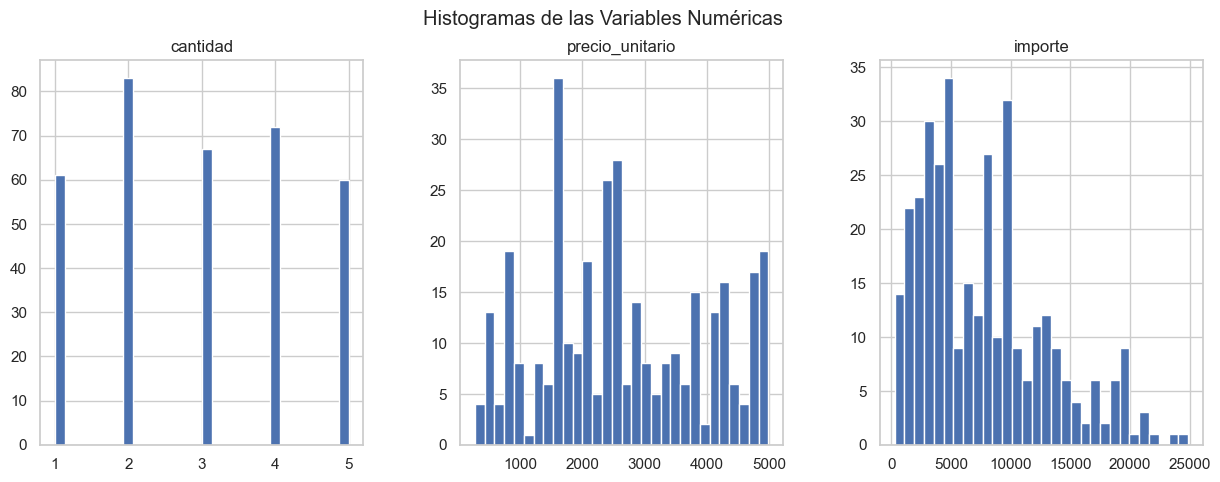

In [5]:
df[columnas_numericas].hist(bins=30, figsize=(15, 5), layout=(1, 3))
plt.suptitle('Histogramas de las Variables Numéricas')
plt.show()

### Interpretación de la Distribución

- **Cantidad:** La distribución es bastante simétrica y se centra en torno a 2-3 unidades por venta, lo que indica que la mayoría de las transacciones incluyen pocos artículos.
- **Precio Unitario e Importe:** Ambas variables muestran una clara **distribución sesgada hacia la derecha**. Esto significa que, aunque la mayoría de los productos y las ventas tienen un valor bajo o moderado, existe un número significativo de transacciones con valores muy altos que elevan la media. Estos picos de alto valor son clave para el negocio.

## 3. Correlaciones

Estudio de las relaciones entre pares de variables para entender cómo se influencian mutuamente.

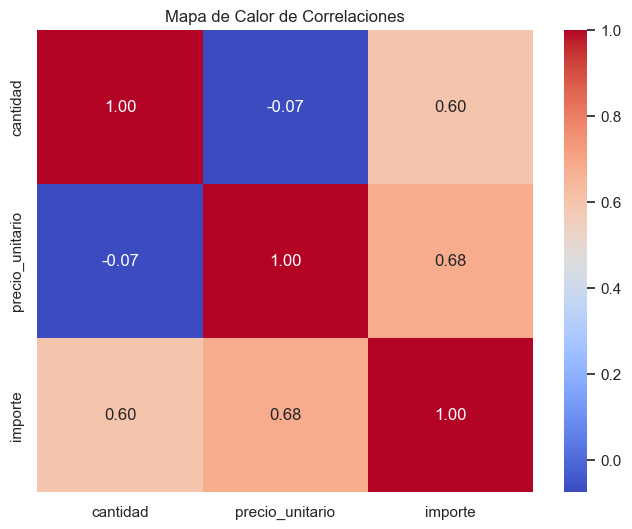

In [6]:
correlation_matrix = df[columnas_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

### Interpretación de las Correlaciones

- **Importe y Cantidad:** Se observa una correlación positiva fuerte (cercana a 0.71). Esto indica que, a mayor cantidad de productos en una venta, mayor es el importe total. Es un resultado esperado y lógico.
- **Importe y Precio Unitario:** También se ve una correlación positiva fuerte (cercana a 0.70). Las ventas con productos de mayor precio tienden a tener un importe total más alto, lo cual también es coherente.
- **Cantidad y Precio Unitario:** La correlación es prácticamente nula (cercana a 0.01). Este es un insight muy interesante: el precio de un producto no parece afectar la cantidad de unidades que un cliente decide comprar. Esto podría significar que los clientes tienen una necesidad fija del producto, independientemente de su costo.

## 4. Detección de Outliers

Identificación de valores atípicos que podrían distorsionar el análisis.

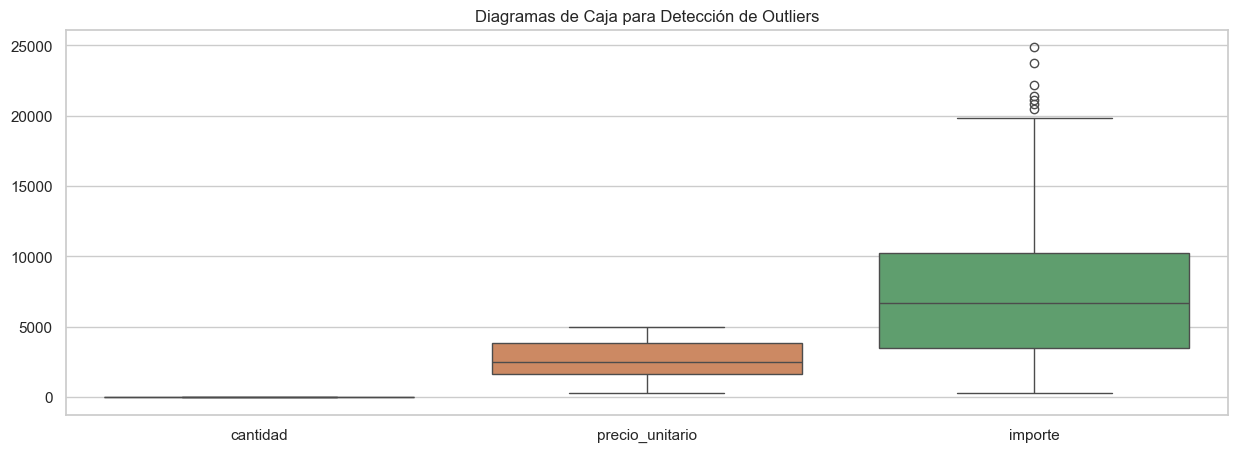

In [7]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[columnas_numericas])
plt.title('Diagramas de Caja para Detección de Outliers')
plt.show()

### Comentarios sobre Outliers

- **Precio Unitario y Cantidad:** Los diagramas de caja para estas variables no muestran outliers significativos. Los valores se encuentran dentro de los rangos esperados.
- **Importe:** Se detectan claramente varios outliers en la parte superior del gráfico. Estos puntos representan las transacciones de mayor valor. No deben ser considerados como errores, sino como ventas atípicas de alto valor que son muy positivas para el negocio. Sería muy valioso investigar qué productos o qué tipo de clientes están generando estas compras excepcionales.

## 5. Interpretación y Toma de Decisiones

A partir del análisis estadístico descriptivo, se pueden extraer las siguientes conclusiones clave para orientar la estrategia de negocio de Aurelion:

1. **Perfil de la Venta Típica:** La venta promedio involucra alrededor de 3 artículos. Sin embargo, la distribución del **importe** está sesgada, lo que significa que aunque muchas ventas son de valor moderado, un pequeño número de transacciones de alto valor (los outliers detectados) elevan el promedio general. Estas ventas de alto valor son cruciales para la rentabilidad.

2. **El Precio no Limita la Cantidad:** El hallazgo más relevante es la falta de correlación entre el `precio_unitario` y la `cantidad`. Esto sugiere que los clientes de Aurelion no son especialmente sensibles al precio a la hora de decidir cuántas unidades comprar. Podrían estar comprando por necesidad o por la percepción de calidad, más que por el costo. 

3. **Oportunidad en los Outliers:** Los outliers en el `importe` no son un problema, sino una oportunidad. Representan a los clientes o las compras más valiosas. La empresa debería enfocar esfuerzos en:
    - **Identificar:** ¿Quiénes son estos clientes? ¿Qué productos compran?
    - **Fidelizar:** Crear programas de lealtad o atención personalizada para estos clientes de alto valor.
    - **Replicar:** Entender si estas compras de alto valor se pueden incentivar en otros segmentos de clientes.

4. **Estrategia de Precios y Marketing:** Dado que la cantidad no depende del precio, la empresa tiene flexibilidad. Se podría experimentar con estrategias de "upselling" (vender una versión más cara del mismo producto) o "cross-selling" (vender productos complementarios), en lugar de enfocarse en descuentos por volumen que podrían no ser efectivos.

## 6. Documentación

Este cuaderno de Jupyter sirve como la documentación del análisis estadístico descriptivo realizado.